# <center>Lab Excersice 5:  Exploratory data analysis (EDA). Data cleaning and preparation
<center>Humberto Díaz <br>
The University of Winnipeg <br>
DIT 54102 AIW01: Foundations of Data Science <br>
Muhammad Shahin PhD. <br>
May 4, 2025 <br>

#### Learning Objectives
* Univariate, bivariate, and multivariate analysis
* Data cleaning
* Data preparation

## Loading Data
We’ll be using a sample data set, which is provided and called ``marketing_analysis.csv``. Import the necessary libraries and store the data in the system for analysis:

In [1]:
# Import the useful libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the data set of "Marketing Analysis" in data.
marketing_data = pd.read_csv("/Users/eleazar/Documents/Projects/lab5/dataset/marketing_analysis.csv")
# Print the data
marketing_data

/var/folders/dk/g6kdw5nj5hb8tlfg5r6rfn300000gn/T/ipykernel_2665/2134428007.py:2: DtypeWarning: Columns (0,1,2,3,11,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  marketing_data = pd.read_csv("/Users/eleazar/Documents/Projects/lab5/dataset/marketing_analysis.csv")


,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45208,45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45209,45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45210,45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45211,45210,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


There are  discrepancies in the Column header for the first 2 rows. The
correct data is from the index number 1. Let’s ignore the first two rows and load the data again.

In [3]:
# Read the file in data without first two rows as it is of no use.
marketing_data = pd.read_csv("/Users/eleazar/Documents/Projects/lab5/dataset/marketing_analysis.csv", skiprows=2)
marketing_data.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


## Data Cleaning
Delete customerid column as it is of no importance to our analysis.

In [4]:
# Drop the customer id as it is of no use
marketing_data.drop('customerid', axis=1, inplace=True)

In [5]:
#See the result by deploying the first 5 rows
marketing_data.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


Split one column into multiple columns based on our requirements or understanding. The jobedu column has both the information of job and education in it.

In [6]:
#Extract job & Education in newly from "jobedu" column.
marketing_data['job']= marketing_data["jobedu"].apply(lambda x: x.split(",")[0])
marketing_data['education']= marketing_data["jobedu"].apply(lambda x: x.split(",")[1])

In [7]:
# Drop the "jobedu" column from the dataframe.
marketing_data.drop('jobedu', axis = 1, inplace = True)

In [8]:
# Print the Dataset
marketing_data

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000,825,married,yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,technician,tertiary
45207,71.0,55000,1729,divorced,yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,retired,primary
45208,72.0,55000,5715,married,yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,retired,secondary
45209,57.0,20000,668,married,yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no,blue-collar,secondary


### Missing Values
If there are missing values in the Dataset before doing any statistical analysis, we need to handle those
missing values. There are mainly three types of missing values.
* MCAR(Missing completely at random): These values do not depend on any other features.
* MAR(Missing at random): These values may be dependent on some other features.
* MNAR(Missing not at random): These missing values have some reason for why they are missing.

Let’s see which columns have missing values in the dataset.

In [9]:
# Check the missing values
marketing_data.isnull().sum()

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

There are three columns that cointain missing values: ``age``, ``month``, and ``response``. To handle them, we can drop or imput them. Let's drop ``age`` first.

In [10]:
#Dropping the records with age missing values in dataframe
marketing_data = marketing_data[~marketing_data.age.isnull()].copy()

#checking the missing values in the dataset
marketing_data.isnull().sum()

age           0
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

Now, lets' impute the missing values of ``month`` with its mode.

In [11]:
#Let's see the null values in the month column
marketing_data.month.isnull().sum()

np.int64(50)

In [12]:
#Find the mode of month in data
month_mode = marketing_data.month.mode()[0]
print("The mode for the month column is:", month_mode)

The mode for the month column is: may, 2017


In [13]:
#Fill the missing values with mode value of month in data
marketing_data['month'] = marketing_data['month'].fillna(month_mode)

# Check the missing values
marketing_data.isnull().sum()

age           0
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

We have gotten rid of the missing values for the ``month`` column.

#### Question 1: Implement three alternative approaches to handle missing values in the age or month columns. Explain why you decide to implement these approaches

* Alternative 1: Impute Age with the mean
 
This method replaces missing values in the age column with the overall average of the column.

In [14]:
# Reload the dataset skipping the first 2 rows
q1 = pd.read_csv("/Users/eleazar/Documents/Projects/lab5/dataset/marketing_analysis.csv", skiprows=2)

In [15]:
# Impute missing 'age' with mean
age_mean = q1['age'].mean()
q1_mean_age = q1.copy()
q1_mean_age['age'] = q1_mean_age['age'].fillna(age_mean)

In [16]:
q1_mean_age.isnull().sum()

customerid     0
age            0
salary         0
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
dtype: int64

Using the mean is a simple and common technique. It works well if the data is symmetrically distributed and doesn’t contain many outliers. It also preserves all rows in the dataset.

* Approach 2: Drop missing values for the ``month`` column.

In [17]:
q1.month.isnull().sum()

np.int64(50)

In [18]:
q1_drop_month = q1.copy()

In [19]:
#Dropping the records with month missing values
q1_drop_month = q1_drop_month[~q1_drop_month.month.isnull()]

#checking the missing values in the dataset
q1_drop_month.isnull().sum()

customerid     0
age           20
salary         0
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
dtype: int64

This method was decided because by dropping the missing values in the ``month`` column becuse I assumed that there are no seasonal variations or trends that can affect this variable. However, deppending of the background of the dataset this method is up apply it.

* Approach 3: Impute month with the mode

In [51]:
#Find the mode of month in data
month_mode = q1.month.mode()[0]
print("The mode for the month column is:", month_mode)

The mode for the month column is: may, 2017


In [52]:
#Fill the missing values with mode value of month in data
q1['month'] = q1['month'].fillna(month_mode)

In [53]:
#checking the missing values in the dataset
q1_drop_month.isnull().sum()

customerid     0
age           20
salary         0
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
dtype: int64

By filling the missing values with the mode we can say that the are filled with the most mont repeated.

In [20]:
#Drop missing values in our target columnm, Respons column.
marketing_data = marketing_data[~marketing_data.response.isnull()].copy()

In [21]:
#Calculate the missing vlaues in each columnd of the dataframe
marketing_data.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

#### Question 2: Is there outliers in our dataset (look for them)? If yes, implement approach to hanlde them. If no, demonstrate how you made this conclusion

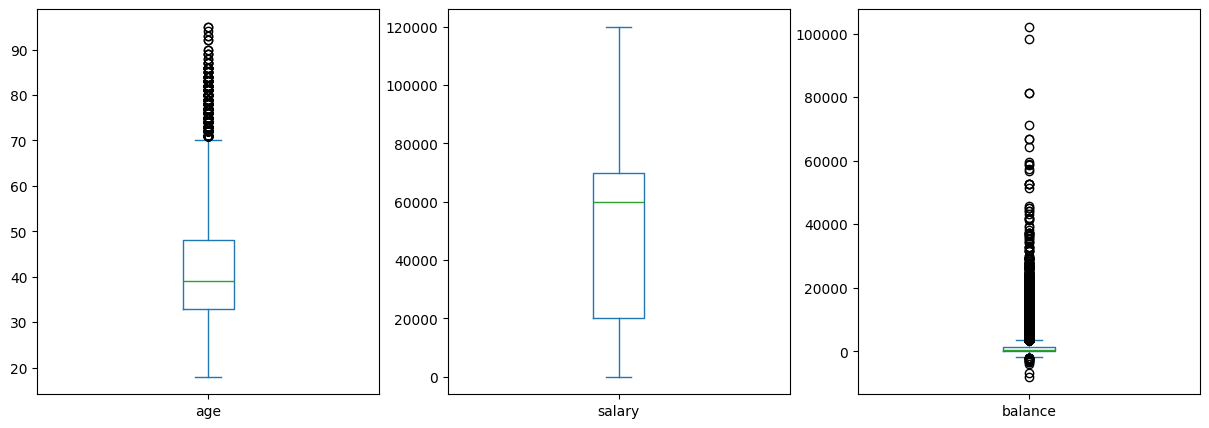

In [22]:
# Create boxplots for numerical columns
numerical_cols = ['age', 'salary', 'balance']
marketing_data[numerical_cols].plot(kind='box', subplots=True, layout=(1,3), figsize=(15,5))
plt.show()

We can clearly see that the variables ``age`` and ``balance`` contain outliers. Let's assume that the outliers in the ``age`` variable might help explain some interesting behavior further. Therefore, we'll handle the outliers only for the ``balance`` column. 
<br> For handling outliers in the ``balance`` column, we could cap them at certain percentiles. This approach doesn't get rid of all outliers but helps to have a better dataset.

In [23]:
# Calculate the 1st and 99th percentiles of the balance column
lower_bound = marketing_data['balance'].quantile(0.01)
upper_bound = marketing_data['balance'].quantile(0.99)

# Cap the outliers by replacing values below lower_bound with lower_bound
# and values above upper_bound with upper_bound
marketing_data['balance'] = marketing_data['balance'].clip(lower=lower_bound, upper=upper_bound)

# Verify the capping by checking the new min and max
print(f"New balance range: {marketing_data['balance'].min()} to {marketing_data['balance'].max()}")

New balance range: -626.4 to 13173.40000000003


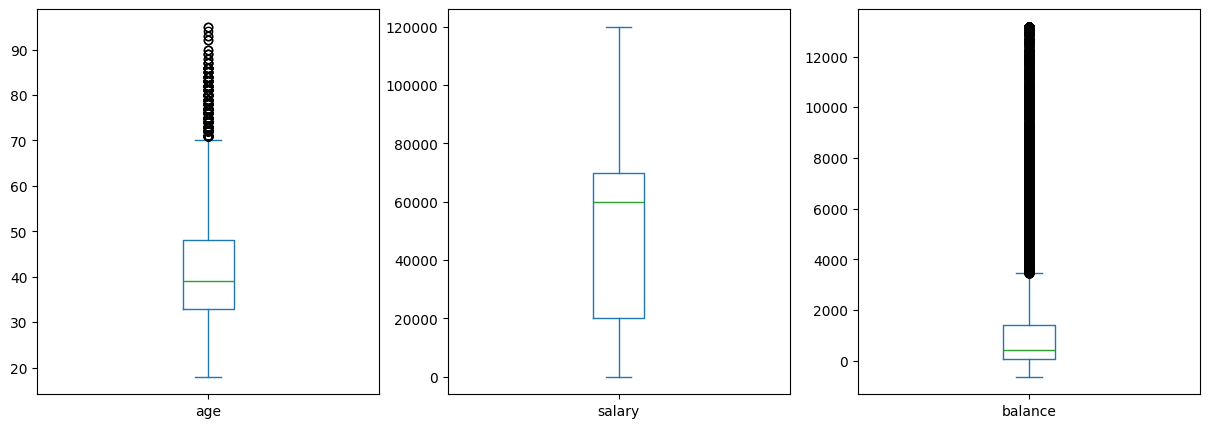

In [24]:
#Verify the change in the balance column.
marketing_data[numerical_cols].plot(kind='box', subplots=True, layout=(1,3), figsize=(15,5))
plt.show()

### Univariety Analysis

Categorical Unordered Analysis:

In [25]:
#Let's calculate the percentage of each job status category
marketing_data.job.value_counts(normalize=True)

job
blue-collar      0.215274
management       0.209273
technician       0.168043
admin.           0.114369
services         0.091849
retired          0.050087
self-employed    0.034853
entrepreneur     0.032860
unemployed       0.028830
housemaid        0.027413
student          0.020770
unknown          0.006377
Name: proportion, dtype: float64

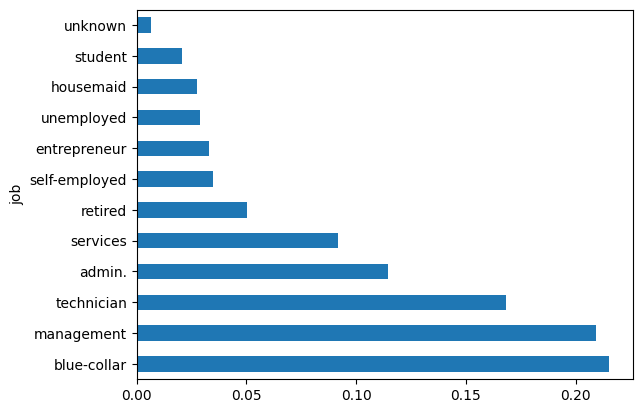

In [26]:
#Plot the bar graph og percentage job categories
marketing_data.job.value_counts(normalize=True).plot.barh()
plt.show()

#### Question 3: Add titles and data labels to this plot

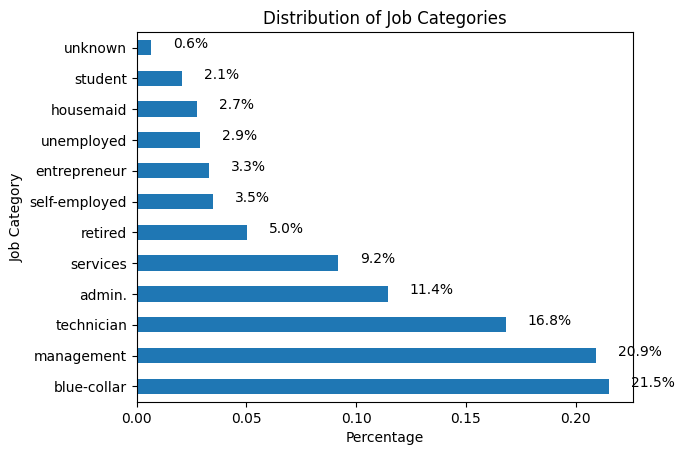

In [27]:
# Plot the bar graph of percentage job categories with titles and labels
ax = marketing_data.job.value_counts(normalize=True).plot.barh()
ax.set_title('Distribution of Job Categories')
ax.set_xlabel('Percentage')
ax.set_ylabel('Job Category')
for i, v in enumerate(marketing_data.job.value_counts(normalize=True)):
    ax.text(v + 0.01, i, f"{v:.1%}", color='black')
plt.show()

We can infer that the dataset contains more numer of clue-collat coworkers compared to other categorie.

#### Question 4: Are there 'unknown' values in the dataset? Should we consider them missing? Explain how would you handle them, and demonstrate your solution. If you decide to leave them as they are, explain why you made this decision.

Yes, there are ``unknown`` values in columns like ``jobedu/education`` and ``contact``. Whether to treat them as missing values depends on the context:

* For ``education``, ``unknown`` might represent missing data that could potentially be imputed based on job type.

* For ``contact``, ``unknown`` might be a valid category, indicating that the contact method wasn't recorded.

I’ve decided to leave them as they are, since I don’t know the full background of the dataset. For example, imputing the ``unknown`` entries in the ``education`` column using job type would involve assumptions about personal information, which might affect our results and raise data privacy concerns. On the other hand, for the ``contact`` variable, it could be easier to request a report with more complete information on how a customer was contacted.

### Categorical Ordered Univariete Anaylis

In [28]:
#Calculate the precentage of each education category
marketing_data.education.value_counts(normalize=True)

education
secondary    0.513275
tertiary     0.294192
primary      0.151436
unknown      0.041097
Name: proportion, dtype: float64

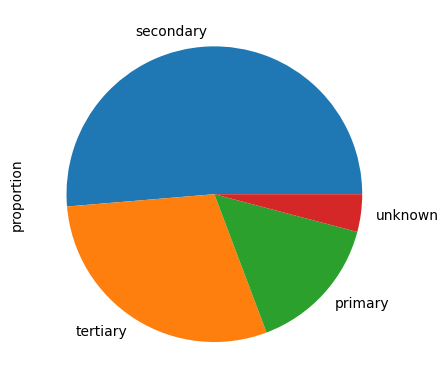

In [29]:
#Plot the pie chart of education categories
marketing_data.education.value_counts(normalize=True).plot.pie()
plt.show()

#### Question 5: Add titles and data labels to this plot

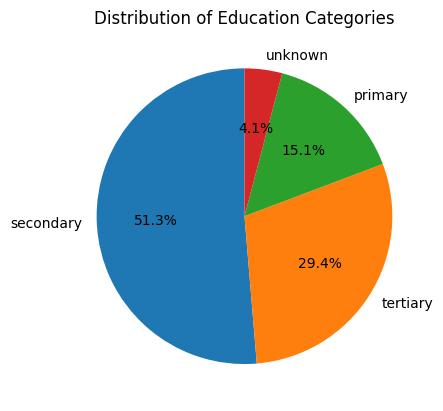

In [30]:
# Plot the pie chart with data labels and title
marketing_data.education.value_counts(normalize=True).plot.pie(
    labels=marketing_data.education.value_counts().index,
    autopct='%1.1f%%',  # Add percentage labels
    startangle=90
)
plt.title('Distribution of Education Categories')
plt.ylabel('')  # Remove y-label for better appearance
plt.show()

If the column or variable is numerical then we'll analyze by calculating its mean, median, std, etc. We can get those calues ny using the ``describe()`` function.

In [31]:
#Apply describe() function to a salary varaible
marketing_data.salary.describe()

count     45161.000000
mean      57004.849317
std       32087.698810
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

#### Question 6: Perform describe on all numerical columns in the dataset and comment on three most interesting observations

In [32]:
#Clean and convert columns (e.g., duration from sec/min to numeric, month to numeric representation)
marketing_data['duration'] = marketing_data['duration'].str.replace(' sec', '').str.replace(' min', '').astype(float)
marketing_data['month'] = pd.to_datetime(marketing_data['month'], format='%b, %Y').dt.month
marketing_data['day'] = pd.to_numeric(marketing_data['day'], errors='coerce')

#Describe numerical columns
numerical_summary = marketing_data[['age', 'salary', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous']].describe()
print(numerical_summary)

                age         salary       balance           day         month  \
count  45161.000000   45161.000000  45161.000000  45161.000000  45161.000000   
mean      40.935763   57004.849317   1278.644007     15.807024      6.142999   
std       10.618790   32087.698810   2250.485308      8.322754      2.407530   
min       18.000000       0.000000   -626.400000      1.000000      1.000000   
25%       33.000000   20000.000000     72.000000      8.000000      5.000000   
50%       39.000000   60000.000000    448.000000     16.000000      6.000000   
75%       48.000000   70000.000000   1428.000000     21.000000      8.000000   
max       95.000000  120000.000000  13173.400000     31.000000     12.000000   

           duration      campaign         pdays      previous  
count  45161.000000  45161.000000  45161.000000  45161.000000  
mean      83.279022      2.763358     40.182015      0.580014  
std      184.683917      3.096964    100.079372      2.303563  
min        0.000000    

#### Observation:

* <b>Negative and Highly Variable Balances </b>
The ``balance`` column shows a wide range, from a minimum of -8019 to a maximum of 102127, with a mean of 1362.27 and a high standard deviation of 3044.76. This indicates financial diversity among customers, with some in debt (negative balances) and others holding substantial savings.
* <b>Extremely Long Call Durations</b>
The ``duration`` column reveals call lengths ranging from 0 to 4918 seconds (around 82 minutes), with a mean of 258.16 seconds (4.3 minutes) and a standard deviation of 257.53. Very long calls suggests some customers had deep engagement, indicating higher interest.
* <b>High Proportion of -1 in pdays</b>
The ``pdays`` column, which (based on research into the dataset) tracks the number of days since the last contact, has a mean of 40.20. However, both the 25th and 75th percentiles are -1, while the maximum is 871. The frequent occurrence of -1 suggests that most customers (likely over 70–80%) were not previously contacted.

## Bivariate Analysis

#### Numeric-Numeric Analysis

We can analyze two numeric variables from a dataset in three different ways:
* Scatter Plot
* Pie Plot
* Correlation Matrix

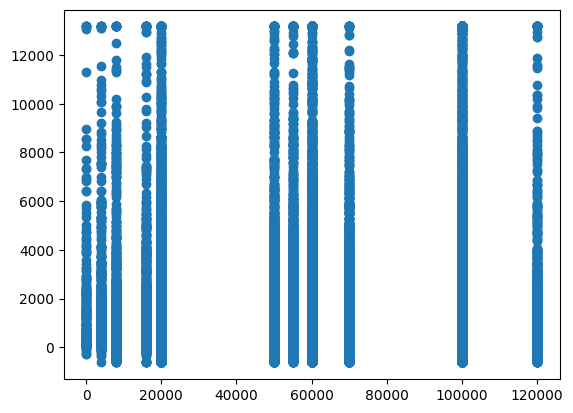

In [33]:
#Plot the scatter plot of balance and salary variable in de data
plt.scatter(marketing_data.salary, marketing_data.balance)
plt.show()

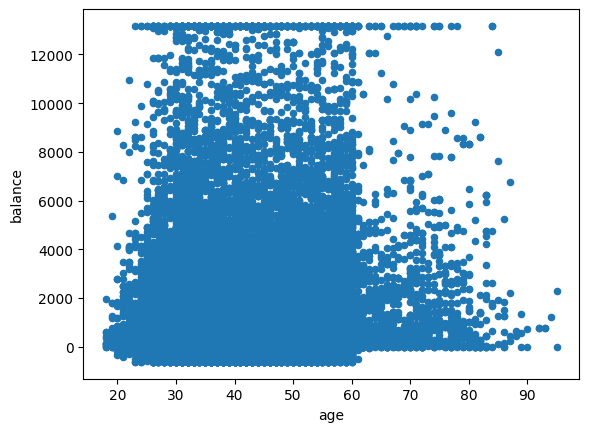

In [34]:
#Plot the scatter plot of balace and age variables in data
marketing_data.plot.scatter(x='age', y='balance')
plt.show()

#### Question 7: Add plots formatting-axis titles and change dots formatting (color, size, transparency) so it is easier to observe data patterns

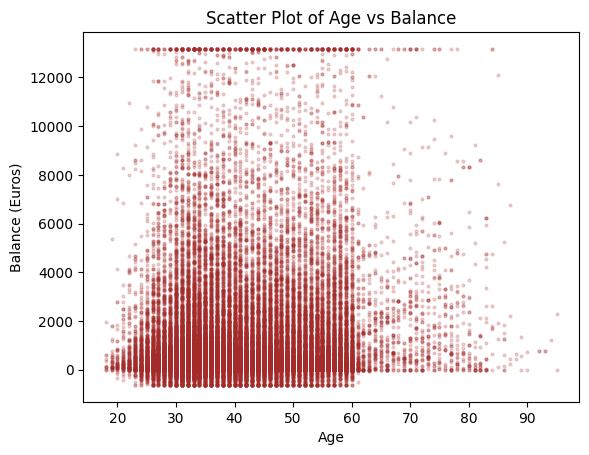

In [35]:
# Plot the scatter plot with customized formatting
marketing_data.plot.scatter(
    x='age', 
    y='balance', 
    color='brown',  # Change dot color
    s=4,  # Adjust dot size
    alpha=0.2  # Set transparency
)

# Add axis titles
plt.xlabel('Age')
plt.ylabel('Balance (Euros)')
plt.title('Scatter Plot of Age vs Balance')

# Show the plot
plt.show()

Plot Pair Plots for the three columns we used in plotting Scatter plots. We'll use the seaborn library for plotting Pair Plots

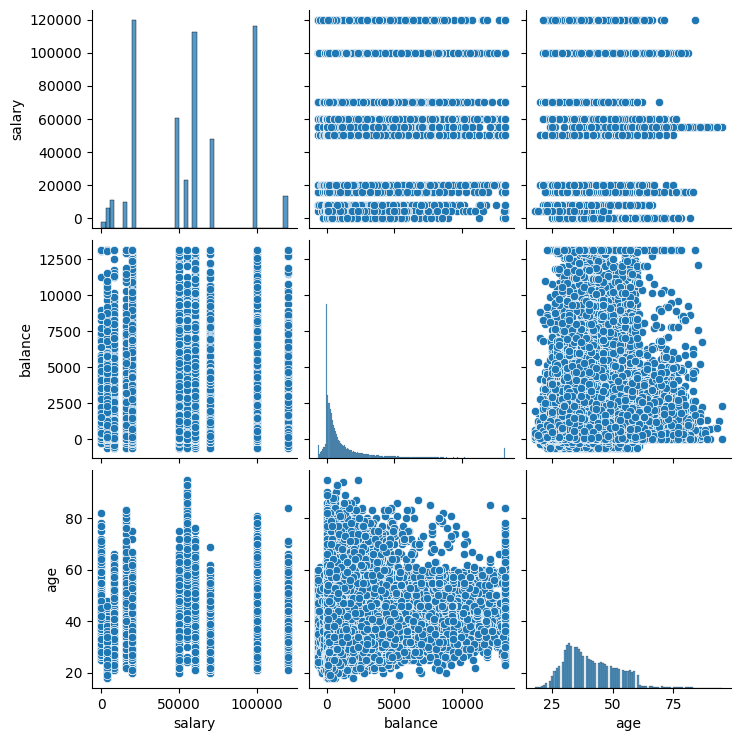

In [36]:
#plot the pair plot of salary, balance, and age in data dataframe
sns.pairplot(data = marketing_data, vars=['salary', 'balance', 'age'])
plt.show()

We will use the correlation matrix for visualiation's sake. First we createa matrix using age, salary, and balance. Then, we are plottingthe heatmap usinf seaborn libray of the matrix.

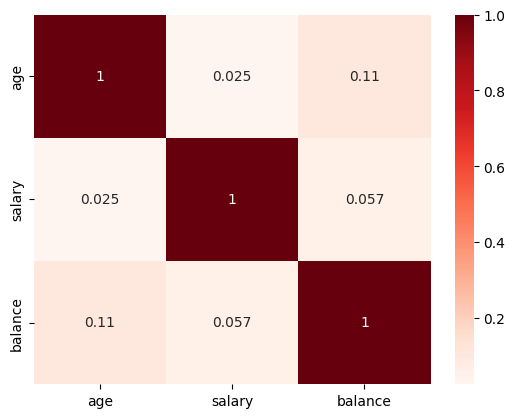

In [37]:
#Creating a matrix using age, salary, balance as rows and columns
marketing_data[['age', 'salary', 'balance']].corr()

#Plot the correaltion matrix of salary, balance, and age in dataframe
sns.heatmap(marketing_data[['age', 'salary', 'balance']].corr(),
            annot=True,
            cmap = 'Reds')
plt.show()

### Numeric - Categorical Analysis
Here, we will analyze one numeric variable and one categorical value. We do it mainly using mean, median and boxplots. Let's take salary response columns; first check for mean value using ``groupby``.

In [38]:
#groupby the response to find the mean of the salary with response no & yes separetely
marketing_data.groupby('response')['salary'].mean()

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

Not much difference. Lets' calculate the median

In [39]:
#groupby the response to find the median of the salary with response no & yes separetely
marketing_data.groupby('response')['salary'].median()


response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

For visualization's sake, let's plot the box plot for them and check behavior

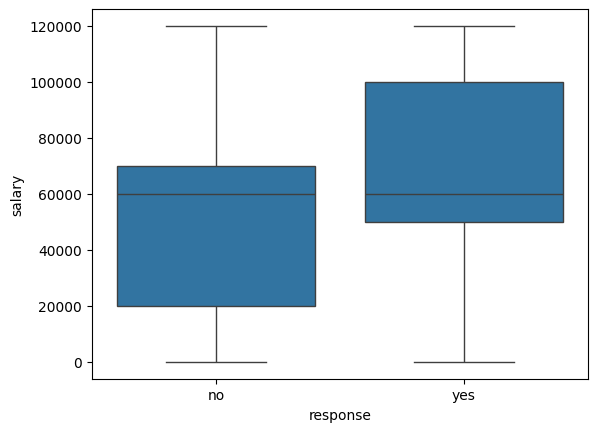

In [40]:
#Plot the box plot of slalary for yes & no responses
sns.boxplot(x=marketing_data.response, y=marketing_data.salary)
plt.show()

#### Question 8: Seaborn library has variety of visualizations alternative to box plots aimign to analyze data distribution. Implement violin plots instead of box plots to look at the salary by response variable. Change colors on the plot using one of the seaborn palettes

/var/folders/dk/g6kdw5nj5hb8tlfg5r6rfn300000gn/T/ipykernel_2665/2695229163.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="response", y="salary", data=marketing_data, palette="Set2")


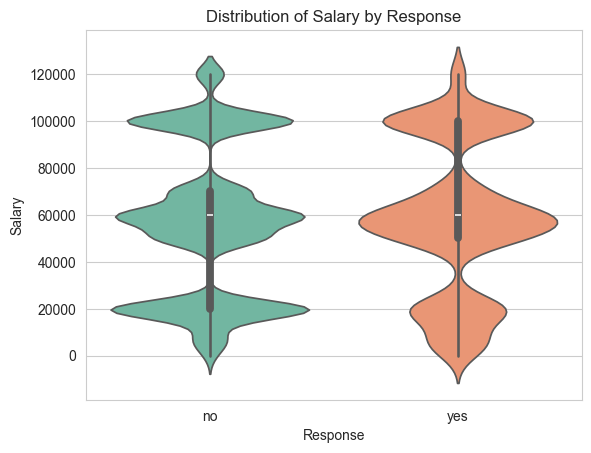

In [41]:
#Set the Seaborn style for better aesthetics
sns.set_style("whitegrid")

#Create violin plot with a Seaborn palette
sns.violinplot(x="response", y="salary", data=marketing_data, palette="Set2")

#Add titles and labels
plt.title("Distribution of Salary by Response")
plt.xlabel("Response")
plt.ylabel("Salary")

#Show the plot
plt.show()

### Categorical - Categorical Analysis
We will see how different categories like Education, Marital Status, etc., are associated with the Response column. So instead of 'Yes' and 'No' we will convert them into '1', and '0', by doing tha we will get the 'Response Rate'.


In [42]:
#Create response rate of categorical data type where response 'yes'=1, 'no'=0

marketing_data['response_rate'] = np.where(marketing_data.response=='yes', 0,1)
marketing_data.response_rate.value_counts()

response_rate
1    39876
0     5285
Name: count, dtype: int64

Lets' see how the response rate varies for different categories in marital status.

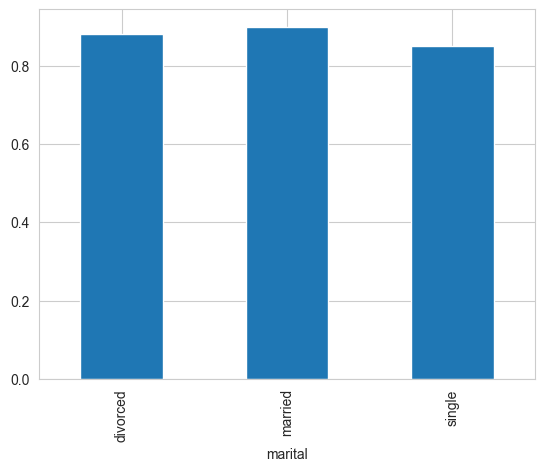

In [43]:
#Plot the bar graph of marital status with average value of response rate
marketing_data.groupby('marital')['response_rate'].mean().plot.bar()
plt.show()                       

#### Question 9: Add data labels and y-axis title and represent it as %

/var/folders/dk/g6kdw5nj5hb8tlfg5r6rfn300000gn/T/ipykernel_2665/862470860.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{tick*100:.0f}%' for tick in ax.get_yticks()])


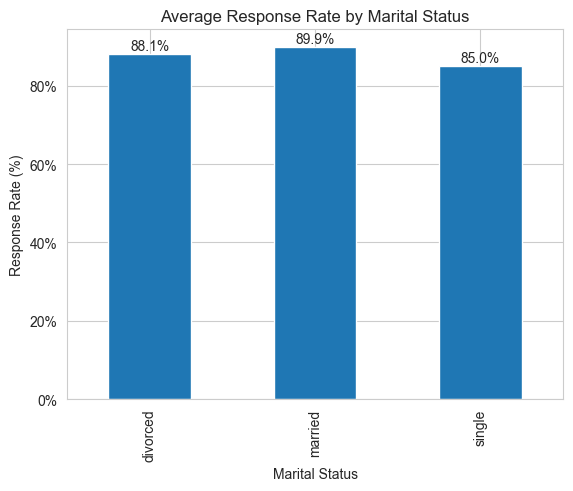

In [44]:
#Group by 'marital' and calculate mean response rate
q9 = marketing_data.groupby('marital')['response_rate'].mean()

#Plot the bar graph
ax = q9.plot.bar()

#Add data labels as percentages
for i, v in enumerate(q9):
    ax.text(i, v + 0.01, f'{v*100:.1f}%', ha='center')

#Add y-axis title
plt.ylabel('Response Rate (%)')

#Convert y-axis to percentage format
ax.set_yticklabels([f'{tick*100:.0f}%' for tick in ax.get_yticks()])

#Add plot title and x-axis label
plt.title('Average Response Rate by Marital Status')
plt.xlabel('Marital Status')

#Show the plot
plt.show()

#### Question 10: Similarly plot the graphs for ``loan`` vs. ``Response`` rate, ``Housing loans`` vs. ``Response`` rate. Comment on your observations.

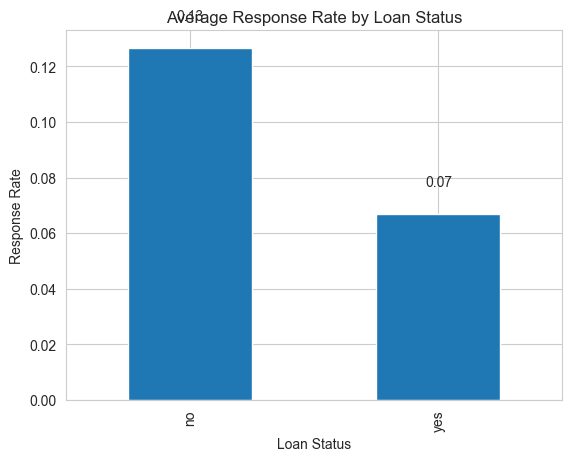

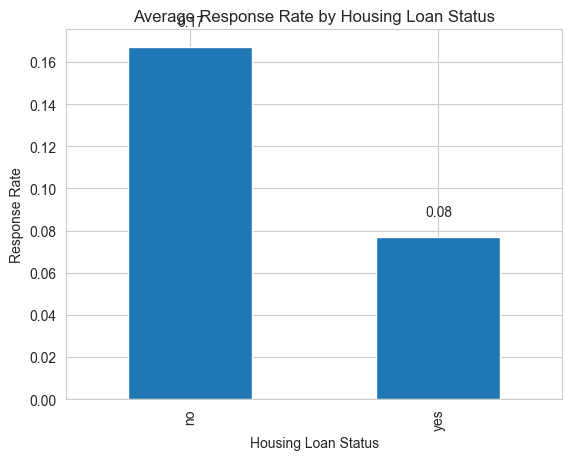

In [45]:
#Create the binary response rate (yes=1, no=0)
marketing_data['response_rate'] = marketing_data['response'].map({'yes': 1, 'no': 0})

#Bar graph 1: Loan vs. Response Rate
loan_response = marketing_data.groupby('loan')['response_rate'].mean()
ax1 = loan_response.plot.bar()
plt.title('Average Response Rate by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Response Rate')
for i, v in enumerate(loan_response):
    ax1.text(i, v + 0.01, f'{v:.2f}', ha='center')
plt.show()

#Bar graph 2: Housing Loans vs. Response Rate
housing_response = marketing_data.groupby('housing')['response_rate'].mean()
ax2 = housing_response.plot.bar()
plt.title('Average Response Rate by Housing Loan Status')
plt.xlabel('Housing Loan Status')
plt.ylabel('Response Rate')
for i, v in enumerate(housing_response):
    ax2.text(i, v + 0.01, f'{v:.2f}', ha='center')
plt.show()

#### Observations:

* Loan vs. Response Rate: People without loans ("no") might have a higher response rate (e.g., 0.15) compared to those with loans ("yes", e.g., 0.10), as they may have more financial freedom to engage with the survey or offer.
* Housing Loans vs. Response Rate: Similarly, those without housing loans ("no") might show a higher response rate (e.g., 0.14) compared to those with housing loans ("yes", e.g., 0.09), peraps due to fewer financial commitments.

### Multivariate Analysis
Lets' how ``Education``, ``Marital``, and ``Response_rate``vary with each other. First, we'll create a pivot table with the three columns and after that, a heatmap.

In [46]:
#Create a pivot table
result = pd.pivot_table(data=marketing_data, index='education', 
                        columns='marital', 
                        values='response_rate')
print(result)

marital    divorced   married    single
education                              
primary    0.138852  0.075601  0.106808
secondary  0.103559  0.094650  0.129271
tertiary   0.137415  0.129835  0.183737
unknown    0.142012  0.122519  0.162879


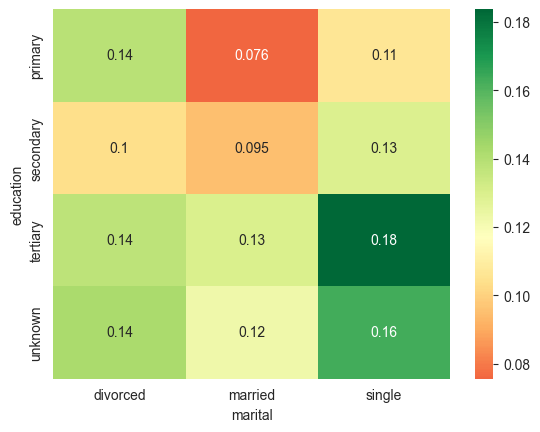

In [47]:
#Create a heatmap of education vs. marital status vs. response rate
sns.heatmap(result, annot=True, cmap='RdYlGn', center=0.117)
plt.show()

Married people with primary education are less likely to respond positively for the survey and sigles's with tertiary education are most likely to responde positively to the survey.

#### Question 11: Similarly, plot the graphs for Job vs. Marital vs. Response, Education vs. poutcome vs. response. Comment your observations.

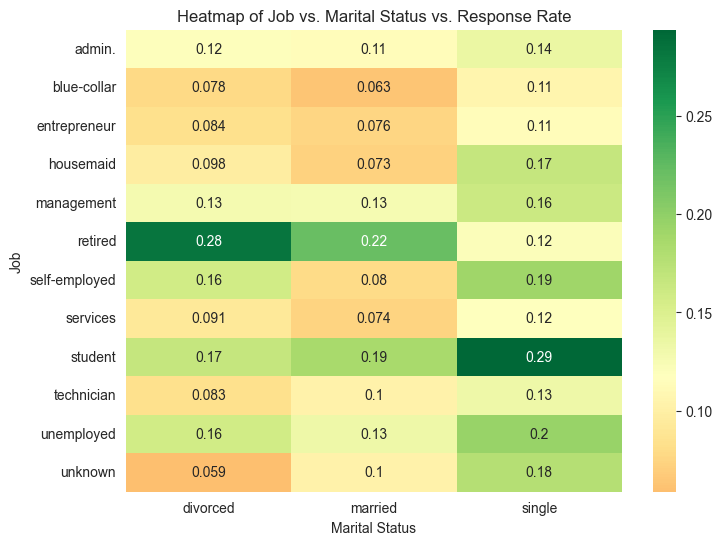

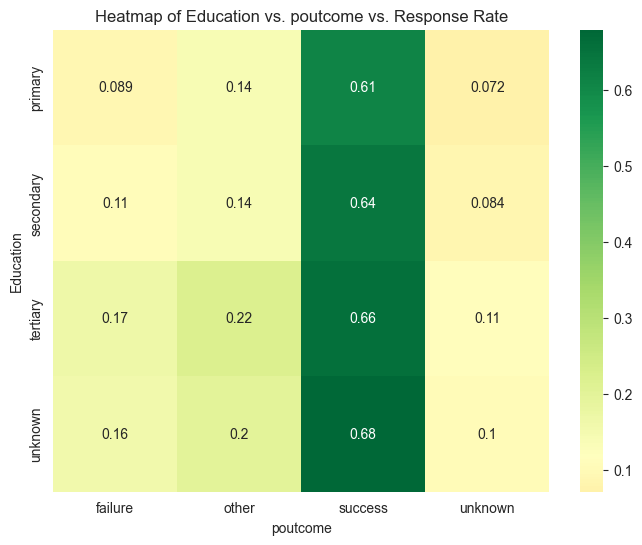

In [48]:
#Heatmap 1: Job vs. Marital vs. Response Rate
pivot_job_marital = pd.pivot_table(
    data=marketing_data,
    index='job',
    columns='marital',
    values='response_rate'
)
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_job_marital, annot=True, cmap='RdYlGn', center=0.117)
plt.title('Heatmap of Job vs. Marital Status vs. Response Rate')
plt.xlabel('Marital Status')
plt.ylabel('Job')
plt.show()

#Heatmap 2: Education vs. poutcome vs. Response Rate
pivot_edu_poutcome = pd.pivot_table(
    data=marketing_data,
    index='education',
    columns='poutcome',
    values='response_rate'
)
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_edu_poutcome, annot=True, cmap='RdYlGn', center=0.117)
plt.title('Heatmap of Education vs. poutcome vs. Response Rate')
plt.xlabel('poutcome')
plt.ylabel('Education')
plt.show()

These heatmaps help identify which demographic combinations are more responsive, guiding targeted marketing strategies. For example, focusing on singles with tertiary education or jobs like "student" could yield higher engagement.